<a href="https://colab.research.google.com/github/pranavkantgaur/Coursera_DL_specialization_from_scratch/blob/master/course1/week2/logistic_regression_with_nn_mindset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import h5py # data loading for hdf5 dataset
from PIL import Image # for loading your images for processing
from scipy import ndimage 
#from lr_utils import load_dataset

In [2]:
!ls

datasets  drive  model	sample_data


## Problem statement
a training set of m_train images, labeled as cat (y =1) or not-cat (y = 0).
a test set of m_test_images
each image is of shape (num_px, num_px, 3), RGB channels 


In [0]:
# implementing utility function for loading cat vs non-cat datasets
def load_dataset():
  train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
  test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
  train_set_x = np.array(train_dataset["train_set_x"][:])
  train_set_y = np.array(train_dataset["train_set_y"][:])
  test_set_x  = np.array(test_dataset["test_set_x"][:])
  test_set_y = np.array(test_dataset["test_set_y"][:])
  classes = np.array(train_dataset["list_classes"][:])

  # lets reshape the arrays
  train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
  test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

  return train_set_x, train_set_y, test_set_x, test_set_y, classes

In [0]:
# load training dataset
x_train_images, y_train_images, x_test_images, y_test_images, classes = load_dataset()
# x_train_images: (m, nx, ny, nc)
# y_train_images: (1, m)

y =  1 Its a cat picture!!


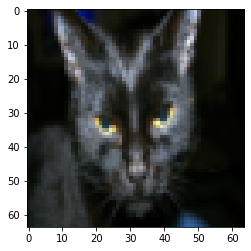

In [6]:
# lets inspect the dataset
image_id = 25
plt.imshow(x_train_images[image_id])
print("y = ", y_train_images[0][image_id], "Its a " + classes[y_train_images[0][image_id]].decode("utf-8") + " picture!!")

In [7]:
# lets inspect the shapes of the dataset arrays
print("Training set shape: ", x_train_images.shape) #  m, nx, ny, nc
print("Training set labels shape: ", y_train_images.shape) # 1, m
print("Test set shape: ", x_test_images.shape)
print("Test set labels shape: ", y_test_images.shape)
print("Each image is of shape: ", x_train_images[0].shape)

Training set shape:  (209, 64, 64, 3)
Training set labels shape:  (1, 209)
Test set shape:  (50, 64, 64, 3)
Test set labels shape:  (1, 50)
Each image is of shape:  (64, 64, 3)


In [8]:
# Lets flatten the train and test image dataset for training
x_train_images_flattened = x_train_images.reshape((x_train_images.shape[0], x_train_images.shape[1] * 
                                                   x_train_images.shape[2] * 
                                                   x_train_images.shape[3], 1)) 
x_train_images_flattened = np.squeeze(x_train_images_flattened)
x_train_images_flattened = x_train_images_flattened.T
x_test_images_flattened = x_test_images.reshape((x_test_images.shape[0], x_train_images.shape[1] * 
                                                 x_test_images.shape[2] * 
                                                 x_test_images.shape[3], 1))

x_test_images_flattened = np.squeeze(x_test_images_flattened)
x_test_images_flattened = x_test_images_flattened.T

# lets print
print("Flattened version of train images: ", x_train_images_flattened.shape)
print("Label set for training dataset: ", y_train_images.shape)
print("Flattened version of test images: ", x_test_images_flattened.shape)
print("Label set for test dataset: ", y_test_images.shape)


print("Sanity check after reshaping: ", x_train_images_flattened[0:5, 0])

Flattened version of train images:  (12288, 209)
Label set for training dataset:  (1, 209)
Flattened version of test images:  (12288, 50)
Label set for test dataset:  (1, 50)
Sanity check after reshaping:  [17 31 56 22 33]


In [0]:
# normalization
x_train_images = x_train_images_flattened / 255.0
x_test_images = x_test_images_flattened / 255.0

## Time to design architecture for Cat vs non-Cat problem
A logistic unit(forward calculations):
\begin{equation*}
z^{(i)} = w^{T}x^{(i)} + b
\end{equation*}
\begin{equation*}
y' = a^{(i)} = sigmoid(z^{(i)})
\end{equation*}
\begin{equation*}
L(y'^{(i)}, y^{(i)}) = - y ^{(i)} log(y'^{i}) - (1 - y^{(i)})log(1 - y'^{(i)})
\end{equation*}

The main steps for building a Neural Network are:

    Define the model structure (such as number of input features)
    Initialize the model's parameters
    Loop:
        Calculate current loss (forward propagation)
        Calculate current gradient (backward propagation)
        Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call model().

In [0]:
def sigmoid(z):
  sigm = 1 / (1 + np.exp(-1.0 * z))
  return sigm

In [0]:
from numpy import save


# create model class
class CatvsNoncatClassifier(object):
  def __init__(self, input_size, num_hidden_units = 1):
    self.n_hidden_units = num_hidden_units
    self.w = np.zeros((self.n_hidden_units, input_size), dtype = 'float32')
    self.b = np.zeros((self.n_hidden_units, 1), dtype = 'float32')
    self.build_model()
  
  def build_model(self): # not required here since foward_prop and back_prop will 
    None                 # do that
    
   
  def initialize_parameters(self, x_shape):
    # init w and b
    self.w = np.zeros((self.n_hidden_units, x_shape), dtype = 'float32')
    self.b = np.zeros((self.n_hidden_units, 1), dtype = 'float32')
  
  def forward_propogation(self, x):
    z = np.dot(self.w, x) + self.b
    y_predicted = sigmoid(z)
    return y_predicted

  def compute_cost(self, y_predicted, y_ground):
    
    L = -1.0 * np.mean(np.dot(y_ground, np.log(y_predicted).T) + np.dot((1 - y_ground), np.log(1 - y_predicted).T)) # cross entropy loss
    #L = np.mean(np.square(np.abs(y_ground - y_predicted))) # mean square loss
    return L    

  def backward_propogation(self, x, y_predicted, y_ground):
    dw = (y_predicted - y_ground) * x.T
    db = (y_predicted - y_ground) 
    #print("shape of y_ground: ", y_ground.shape)
    #print("shape of y_predicted: ", y_predicted.shape)
    #print("value of dw: ", dw)
    #print("value of db: ", db)
    return dw, db # both are vectors

  def update_parameters(self, dw, db, learning_rate):     
    self.w = self.w - learning_rate * dw
    self.b = self.b - learning_rate * db
    
    
  def train_model(self, x, y_ground, learning_rate = 0.001, n_training_epochs = 10):
    self.initialize_parameters(x.shape[0])
    losses = []
    for i in range(n_training_epochs): # no concept of mini-batch yet.
      predictions = [] # for collecting predictions across an epoch
      ground_truths = []
      for j in range(x.shape[1]): # for each training example
        x_sample = x[:, j]
        x_sample = x_sample.reshape(x_sample.shape[0], 1)
        y_sample  = y_ground[:, j]
        y_sample = y_sample.reshape(1, y_sample.shape[0])

        y_predicted = self.forward_propogation(x_sample) 
 
        dw, db = self.backward_propogation(x_sample, y_predicted, y_sample)
        self.update_parameters(dw, db, learning_rate)
        predictions.append(y_predicted)
        ground_truths.append(y_sample)

      predictions_array = np.asarray(predictions).reshape(1, len(predictions))
      ground_truths_array = np.asarray(ground_truths).reshape(1, len(ground_truths))
      loss_per_epoch = self.compute_cost(predictions_array, ground_truths_array)
      if (i % 100 == 0):
        print("Loss value at epoch: ", i, " is: ", loss_per_epoch)
      losses.append(loss_per_epoch) 
    # save parameters
    save("model/w.npy", self.w)
    save("model/b.npy", self.b)
    plt.xlabel("#epoch")
    plt.ylabel("loss")
    plt.plot(range(n_training_epochs), losses)
    plt.show()

  def evaluate_model(self, x_test, y_test):
     predictions = []
     grounds = []
     self.w = np.load('model/w.npy')
     self.b = np.load('model/b.npy')
     for i in range(x_test.shape[1]):
       y_predicted = self.forward_propogation(x_test[:, i])
       predictions.append(y_predicted)
       grounds.append(y_test[:, i])
     print("Accuarcy of the trained model: ", 100 - np.mean(np.abs(np.asarray(predictions).reshape(len(predictions), 1) 
                                                                  - np.asarray(grounds).reshape(len(grounds), 1)))
                                                                  * 100, "%")

In [0]:
# data(train and test) has already being loaded and preprocessed
classifier = CatvsNoncatClassifier(num_hidden_units=1, input_size = x_train_images.shape[0])

Loss value at epoch:  0  is:  554.1028161656984
Loss value at epoch:  100  is:  1.9328058871755331
Loss value at epoch:  200  is:  1.1084477948019094
Loss value at epoch:  300  is:  0.7824127907364721
Loss value at epoch:  400  is:  0.5702710162626643
Loss value at epoch:  500  is:  0.4358805572019496
Loss value at epoch:  600  is:  0.3526879642487003
Loss value at epoch:  700  is:  0.29831375417073913
Loss value at epoch:  800  is:  0.2601767782423329
Loss value at epoch:  900  is:  0.23180858378801283
Loss value at epoch:  1000  is:  0.20974506442872715
Loss value at epoch:  1100  is:  0.19199912267949204
Loss value at epoch:  1200  is:  0.17735348865785286
Loss value at epoch:  1300  is:  0.1650194679734543
Loss value at epoch:  1400  is:  0.15446179728060494
Loss value at epoch:  1500  is:  0.14530308716866536
Loss value at epoch:  1600  is:  0.1372687305439904
Loss value at epoch:  1700  is:  0.13015357310640777
Loss value at epoch:  1800  is:  0.12380089395144547
Loss value at ep

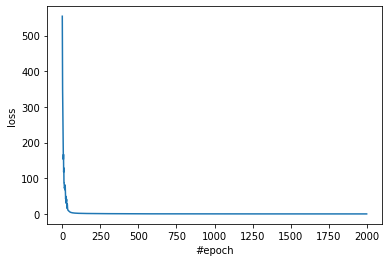

In [108]:
# comment out this line if model is already trained.
classifier.train_model(x_train_images, y_train_images, learning_rate = 0.005,
                         n_training_epochs = 2000)

In [109]:
classifier.evaluate_model(x_test_images, y_test_images)

Accuarcy of the trained model:  69.56011605053672 %


# A  vectorized version

In [0]:
class  VectorizedCatvsNoCatClassifier(object):
  
  def __init__(self, n_hidden_units):
    # hyperparameters
    self.n_hidden_units = n_hidden_units 
    self.lr = 0.0
    self.n_epochs = 0
    # parameters
    self.w = 0 
    self.b = 0
    

  def initialize_parameters(self, nx_ny):
    self.w = np.zeros((self.n_hidden_units, nx_ny), dtype = 'float32')
    self.b = np.zeros((self.n_hidden_units, 1), dtype='float32')
    
  
  def forward_prop(self, X):
    Z = np.dot(self.w, X) + self.b
    A = sigmoid(Z)
    assert(A.shape == (self.n_hidden_units, X.shape[1]))
    return A
  
  def backward_prop(self, X, A, Y, m):
    dw = np.dot((A - Y), X.T) / m # assumes single hidden unit, else A.shape != Y.shape
    db = np.mean(A - Y)
    assert(dw.shape == self.w.shape)
    assert(db.dtype == float)
    return dw, db     

  def update_parameters(self, dw, db):
    self.w = self.w - self.lr * dw
    self.b = self.b  - self.lr * db 

  def compute_cost(self, Y, A, m):
    cost = -(np.dot(Y, np.transpose(np.log(A))) + np.dot(1 - Y, np.transpose(np.log(1 - A)))) / m
    return cost
     

  def train(self, X, Y, lr = 0.001, n_epochs = 10):
    
    m = X.shape[1] # number of training examples
    nx_ny = X.shape[0] # size of a flattened image example
    self.initialize_parameters(nx_ny)
    self.lr = lr
    self.n_epochs = n_epochs

    losses = []
    for i in range(self.n_epochs):
      A = self.forward_prop(X)
      dw, db = self.backward_prop(X, A, Y, m)                   
      self.update_parameters(dw, db)
      cost = self.compute_cost(Y, A, m)
      if(i % 100 == 0):
        print("Loss over epoch: ", i, ": ", cost)
        print("Training accuracy: ", 100 - np.mean(np.abs(A - Y)) * 100)  
      losses.append(cost)
    # save parameters for evaluation
    save("model/v_w.npy", self.w)
    save("model/v_b.npy", self.b)
    # plot the performance
    plt.plot(range(n_epochs), np.squeeze(losses))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    print("Final Training accuracy: ", 100 - np.mean(np.abs(A - Y)) * 100)

  def evaluate(self, X, Y):
    self.w = np.load('model/v_w.npy')
    self.b = np.load('model/v_b.npy')   
    A = self.forward_prop(X)
    print("Test accuracy: ", 100 - np.mean(np.abs(A - Y)) * 100)

In [0]:
vect_catvsnoncat = VectorizedCatvsNoCatClassifier(n_hidden_units = 1)

Loss over epoch:  0 :  [[0.69314718]]
Training accuracy:  50.0
Loss over epoch:  100 :  [[0.58450836]]
Training accuracy:  58.842658156087715
Loss over epoch:  200 :  [[0.46694904]]
Training accuracy:  65.3666766905704
Loss over epoch:  300 :  [[0.37600687]]
Training accuracy:  70.74250902442145
Loss over epoch:  400 :  [[0.33146329]]
Training accuracy:  74.00656362994198
Loss over epoch:  500 :  [[0.30327307]]
Training accuracy:  75.8896260035821
Loss over epoch:  600 :  [[0.27987959]]
Training accuracy:  77.4872147417223
Loss over epoch:  700 :  [[0.26004214]]
Training accuracy:  78.8661599644488
Loss over epoch:  800 :  [[0.24294068]]
Training accuracy:  80.07226734707686
Loss over epoch:  900 :  [[0.22800422]]
Training accuracy:  81.13904798116312
Loss over epoch:  1000 :  [[0.21481951]]
Training accuracy:  82.09149053811643
Loss over epoch:  1100 :  [[0.20307819]]
Training accuracy:  82.94863110664079
Loss over epoch:  1200 :  [[0.19254428]]
Training accuracy:  83.72525943780087
L

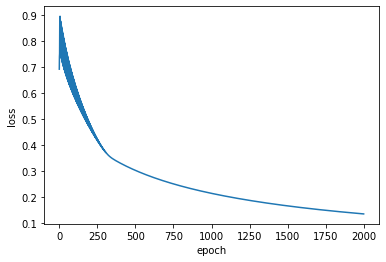

In [103]:
vect_catvsnoncat.train(x_train_images, y_train_images, lr = 0.005, 
                       n_epochs = 2000)

In [104]:
vect_catvsnoncat.evaluate(x_test_images, y_test_images)

Test accuracy:  64.8468118045174
